# Практическая работа №5. Библиотека Pandas. Визуальный анализ данных

## Комплексное задание №1. Применение основных методов для анализа данных

1. Скачайте этот блокнот к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература
- [**Блокнот с теорией**](https://colab.research.google.com/drive/1SLqmaYz4xEsxVV-LGwb3ityheBTzHJQu?usp=sharing)
- http://pandas.pydata.org/pandas-docs/stable/10min.html
- https://pandas.pydata.org/pandas-docs/stable/indexing.html
- https://pandas.pydata.org/pandas-docs/stable/missing_data.html

В этом задании мы с Вами рассмотрим датасет [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult).
Основывается он на данных переписи населения 1994 года в США.

Расшифровка содержимого колонок:

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous. sampling weight, more here: SIPP Weighting.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous. Income from investment sources, apart from wages/salary.
- capital-loss: continuous. Losses from investment sources, apart from wages/salary.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np

pd.__version__

'1.5.3'

Если вы увидели warning, не переживайте, всё хорошо.
- https://stackoverflow.com/questions/40845304/runtimewarning-numpy-dtype-size-changed-may-indicate-binary-incompatibility
- https://github.com/numpy/numpy/pull/432

In [51]:
columns='age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income'.split(',')
# df = pd.read_csv('../../data/adult.csv.gz', na_values='?') # можно загрузить из файла или URL
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values=' ?', names=columns)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


1) Выведите последние 10 элеметнов датасета

In [ ]:
df.tail(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32551,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32552,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


2) Сколько колонок и сколько строк в этом датасете?

In [ ]:
df.shape

(32561, 15)

3) Какие типы данных у элементов этого датасета?

In [ ]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

4) Какие признаки имеют пропуски?

In [ ]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

5) Как вы думаете, с чем связаны пропуски этих значение. Напишите развернутый ответ в ячейке ниже.

Ваш ответ: возможно это случвйные пропски ил иэти данные были не указаны самим человеком / не мог указать данные из-за особенности профессии

6) Какие и сколько различных рабочих классов workclass представлено в выборке?

In [ ]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

7) Какой средний возраст женщин и мужчин?

In [ ]:
df.groupby('sex')['age'].mean()

sex
 Female    36.858230
 Male      39.433547
Name: age, dtype: float64

8) Постройте гистограмму(bar) распределения образования людей (education)

<Axes: xlabel='education'>

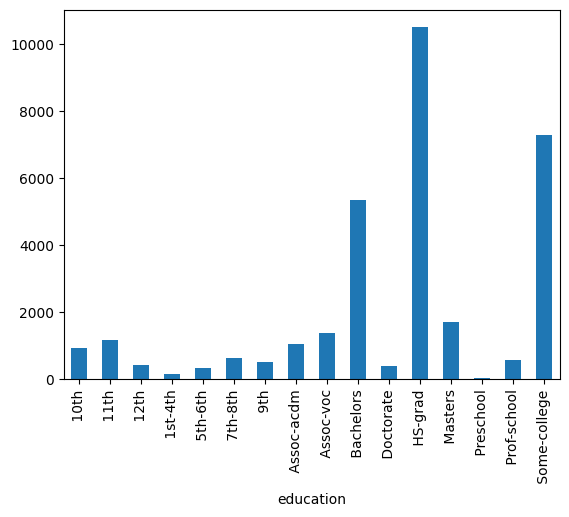

In [ ]:
df.groupby('education')['age'].count().plot(kind='bar')

9) Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак income) и тех, кто получает менее 50K в год?

In [ ]:
print(df.groupby('income')['age'].mean())
print(df.groupby('income')['age'].std())

income
 <=50K    36.783738
 >50K     44.249841
Name: age, dtype: float64
income
 <=50K    14.020088
 >50K     10.519028
Name: age, dtype: float64


10) Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)

<Axes: xlabel='education'>

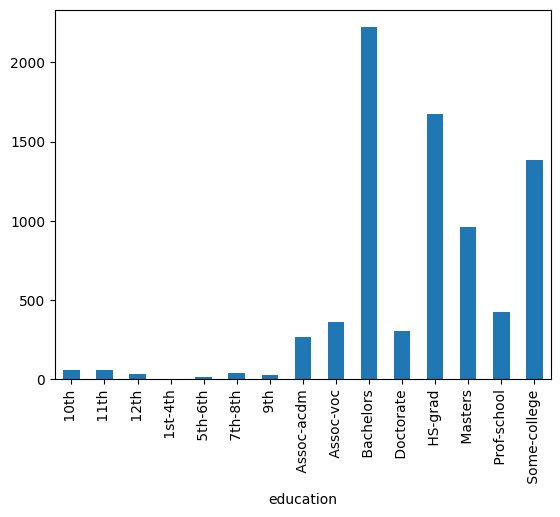

In [ ]:
rich_people = df[df['income'] == ' >50K']
rich_people.groupby('education').count()['age'].plot(kind='bar')

11) Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.

In [ ]:
married = df[
    ((df['marital.status'] == ' Married-civ-spouse') |
    (df['marital.status'] == 'Married-spouse-absen') |
    (df['marital.status'] == ' Married-AF-spouse')) &
    (df['sex'] == ' Male')
    ]

nonmarried = df[~(
    (df['marital.status'] == ' Married-civ-spouse') |
    (df['marital.status'] == 'Married-spouse-absen') |
    (df['marital.status'] == ' Married-AF-spouse')) &
    (df['sex'] == ' Male')
    ]
print('Среди женатых -', married.groupby('income')['age'].count()[' >50K'], 'мужчин зарабатывают больше 50 тысяч')
print('Среди НЕ женатых -', nonmarried.groupby('income')['age'].count()[' >50K'], 'мужчин зарабатывают больше 50 тысяч')

Среди женатых - 5942 мужчин зарабатывают больше 50 тысяч
Среди НЕ женатых - 720 мужчин зарабатывают больше 50 тысяч


12) Постройте [сводную таблицу](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) для отображения зависимостей среднего времени работы (hours.per.week) с доходом (income) для каждой страны (native.country).  


> Пример фрагмента таблицы:



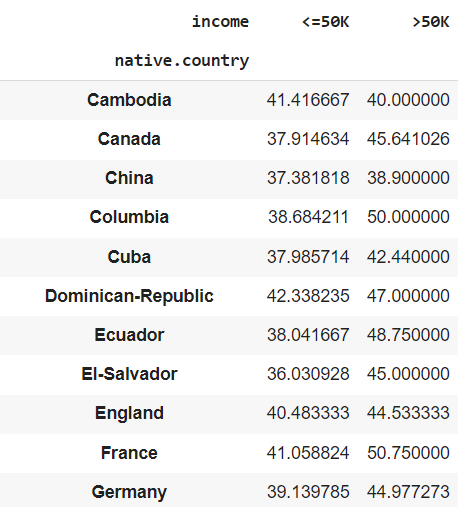

In [ ]:
pd.pivot_table(df,
               index='native.country',
               columns= 'income',
               values='hours.per.week',
               aggfunc='mean')


income,<=50K,>50K
native.country,,
Cambodia,41.416667,40.000000
Canada,37.914634,45.641026
China,37.381818,38.900000
Columbia,38.684211,50.000000
Cuba,37.985714,42.440000
Dominican-Republic,42.338235,47.000000
Ecuador,38.041667,48.750000
El-Salvador,36.030928,45.000000
England,40.483333,44.533333


13) Постройте сводную таблицу для сравнения уровня образования и разности между capital.gain и capital.loss по следующему алгоритму:&nbsp;  
1. Создайте вспомогательную таблицу (датафрейм) и добавьте в неё столбец "education" из целевой таблицы
2. Добавьте во вспомогательную таблицу ещё один столбец "capital.diff", значиниями которого будут являться разности столбцов capital.gain и capital.loss целевой таблицы
3. Удалите во вспомогательной таблице все строки, в которых значение столбца "capital.diff" равно нулю  
&nbsp; Подсказка:
```
summary_table = summary_table[summary_table['capital.diff'] != 0 ]
```
4. Для набора значений из столбца "capital.diff", необходимо сформировать 10 категорий (кластеров), это можно сделать с помощью математических функций, типа log, извлечение корня N-ой степени и округления, для последующего перехода к категориальным признакам.  
  * В нашем случае, можно воспользоваться методом [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html) и равномерно разделить наш набор данных на целевое количество категорий
5. Добавьте во вспомогательную таблицу столбец "categories", и проинициализируйте его значениями категорий, которые возвращает метод pd.qcut()  
&nbsp; Пример:
```
summary_table['categories'] = pd.qcut(summary_table["capital.diff"], q = 10)

6. Постройте сводную таблицу с помощью метода pivot_table(),

Примерная структура таблицы (в качестве значений выводится количество людей, относящихся к той или иной группе):

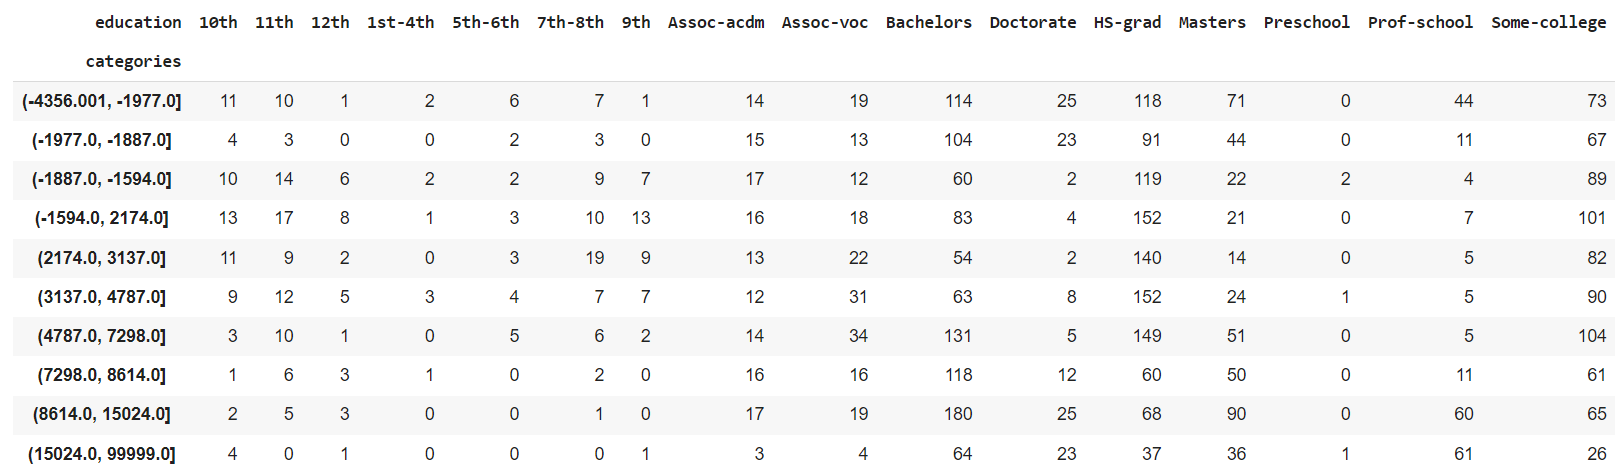

In [ ]:
summary_table = df.loc[:, ['education']]
summary_table['capital.diff'] = df['capital.gain'] - df['capital.loss']
summary_table = summary_table[summary_table['capital.diff'] != 0 ]
summary_table['categories'] = pd.qcut(summary_table["capital.diff"], q = 10)
pd.pivot_table(df,
               index=summary_table['categories'],
               columns='education',
               values='age',
               aggfunc='count'

)

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
categories,,,,,,,,,,,,,,,,
"(-8712.001, -3954.0]",11,10,1,2,6,7,1,14,19,114,25,118,71,0,44,73
"(-3954.0, -3774.0]",4,3,0,0,2,3,0,15,13,104,23,91,44,0,11,67
"(-3774.0, -3188.0]",10,14,6,2,2,9,7,17,12,60,2,119,22,2,4,89
"(-3188.0, 2174.0]",13,17,8,1,3,10,13,16,18,83,4,152,21,0,7,101
"(2174.0, 3137.0]",11,9,2,0,3,19,9,13,22,54,2,140,14,0,5,82
"(3137.0, 4787.0]",9,12,5,3,4,7,7,12,31,63,8,152,24,1,5,90
"(4787.0, 7298.0]",3,10,1,0,5,6,2,14,34,131,5,149,51,0,5,104
"(7298.0, 8614.0]",1,6,3,1,0,2,0,16,16,118,12,60,50,0,11,61
"(8614.0, 15024.0]",2,5,3,0,0,1,0,17,19,180,25,68,90,0,60,65


14) Женщины из каких стран получают в среднем большую зарплату (>50K) чаще.

In [59]:
rich_woman = df[(df['sex'] == ' Female') & (df['income'] == ' >50K')]
rich_woman.groupby('native.country')['age'].count().sort_values(ascending=False)

native.country
 United-States         1072
 Philippines             12
 Canada                   9
 Germany                  7
 England                  6
 Japan                    5
 China                    5
 Italy                    5
 Taiwan                   4
 Cuba                     3
 France                   3
 South                    3
 Mexico                   2
 Dominican-Republic       2
 India                    2
 Iran                     2
 Puerto-Rico              2
 Portugal                 2
 Poland                   2
 Vietnam                  1
 Thailand                 1
 Scotland                 1
 Greece                   1
 Nicaragua                1
 Haiti                    1
 Laos                     1
 El-Salvador              1
 Jamaica                  1
 Ireland                  1
 Hungary                  1
 Hong                     1
 Honduras                 1
 Yugoslavia               1
Name: age, dtype: int64

15) Создайте случайную колонку - magic_salary, которую нужно будет вычислить следующим образом: если зарплата небольшая (<50K), тогда случайно выберите число из диапазона [0,50]. Если зарплата выше 50K тогда из диапазона [51, 200]. Посчитайте среднюю зарплату в час для групп людей с одни уровнем образования на основе нашей случайной колонки magic_salary

In [60]:
df['magic_salary'] = df['income'].apply(lambda x: np.random.randint(0, 50) if ' <=50K' in x else np.random.randint(51, 200))
income_by_education = df.groupby('education')['magic_salary'].apply(lambda x: ((x / 4) / df.loc[x.index, 'hours.per.week']).mean()).sort_values(ascending=False)
income_by_education

education
 Doctorate       0.666298
 Prof-school     0.583653
 Masters         0.541338
 Bachelors       0.420834
 Assoc-acdm      0.376182
 Assoc-voc       0.353047
 Some-college    0.315691
 10th            0.276593
 HS-grad         0.272724
 11th            0.265662
 7th-8th         0.254467
 12th            0.244653
 9th             0.235724
 1st-4th         0.230801
 5th-6th         0.206635
 Preschool       0.190776
Name: magic_salary, dtype: float64

## Комплексное задание №2. Визуальный анализ данных. Часть 1

In [66]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

В этом задании Вам предлагается провести визуальный анализ датасета о прокатах велосипедов https://www.kaggle.com/c/bike-sharing-demand/data. Оригинальная задача предполагает построение модели предсказания количества прокатов в городе в зависимости от погоды.

Для каждого дня проката известны следующие признаки (как они были указаны в источнике данных):
- season: 1 - весна, 2 - лето, 3 - осень, 4 - зима
- yr: 0 - 2011, 1 - 2012
- mnth: от 1 до 12
- holiday: 0 - нет праздника, 1 - есть праздник
- weekday: от 0 до 6
- workingday: 0 - нерабочий день, 1 - рабочий день
- weathersit: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
- temp: температура в Цельсиях
- atemp: температура по ощущениям в Цельсиях
- hum: влажность
- windspeed(mph): скорость ветра в милях в час
- windspeed(ms): скорость ветра в метрах в секунду
- cnt: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

Загрузите самостоятельно(!), с помощью pandas файл `bikes_rent.csv.gz` и выведите первые 5 строк. Ознакомьтесь с данными с помощью функций describe и info.

In [154]:
columns='datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count'.split(',')
df = pd.read_csv('https://raw.githubusercontent.com/siyuanligit/Bike-Sharing-Demand-Kaggle/master/data/train.csv',skiprows=[0], names=columns)

df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Давайте посмотрим на графиках, как целевой признак зависит количество прокатов (cnt) зависит от остальных признаков `df.columns[:-1]`.

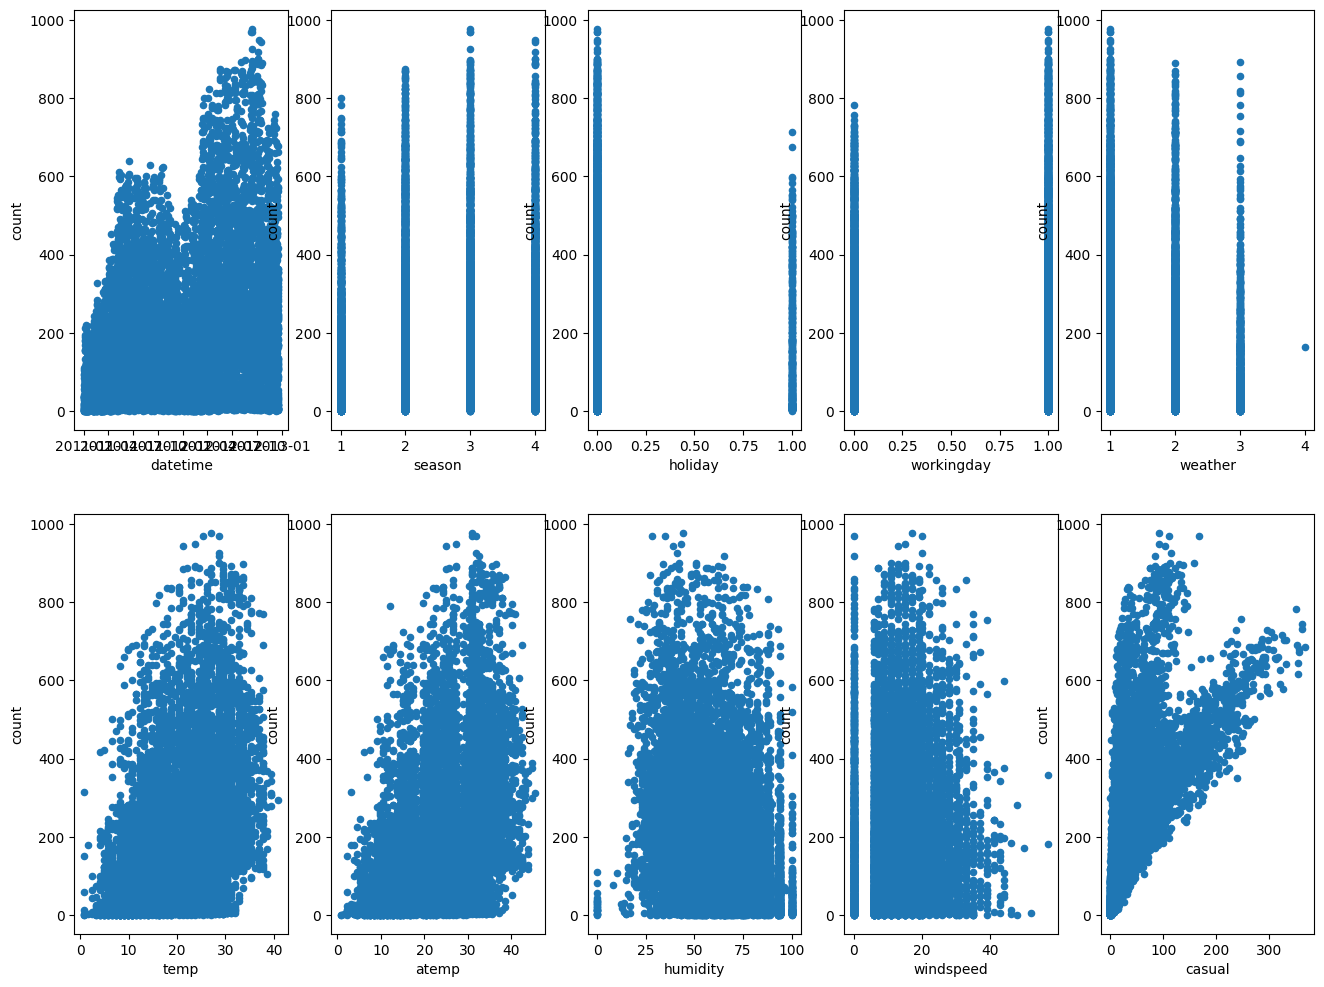

In [80]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(16, 12))
for idx, feature in enumerate(df.columns[0:10]):
     df.plot(feature, "count", subplots=True, kind="scatter", ax=axes[idx // 5, idx % 5])

### 1. Ответьте на вопросы:

#### Каков характер зависимости числа прокатов от месяца?





**ответ**: оченью чаще

#### Укажите один или два признака, от которых число прокатов скорее всего зависит линейно
_(чем больше значение, тем больше прокатов или наоборот, например)_

Можете проверить результат с помощью lnplot.



Ответ: праздничные день или нет и рабочий дент или нет


### 2. Корреляционная матрица

Напомним, что корреляция отражает взаимосвязь двух случайных величин. Она бывает положительная и отрицательная. Чем ближе коэффициент корреляции к нулю, тем меньше взаимосвязь. Чем больше абсолютная корреляци, тем взаимосвязь больше.

Постройте heatmap корреляционной матрицы. Матрица формируется средствами pandas, со стандартным значением параметров.



<ipython-input-70-8cafc0909299>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


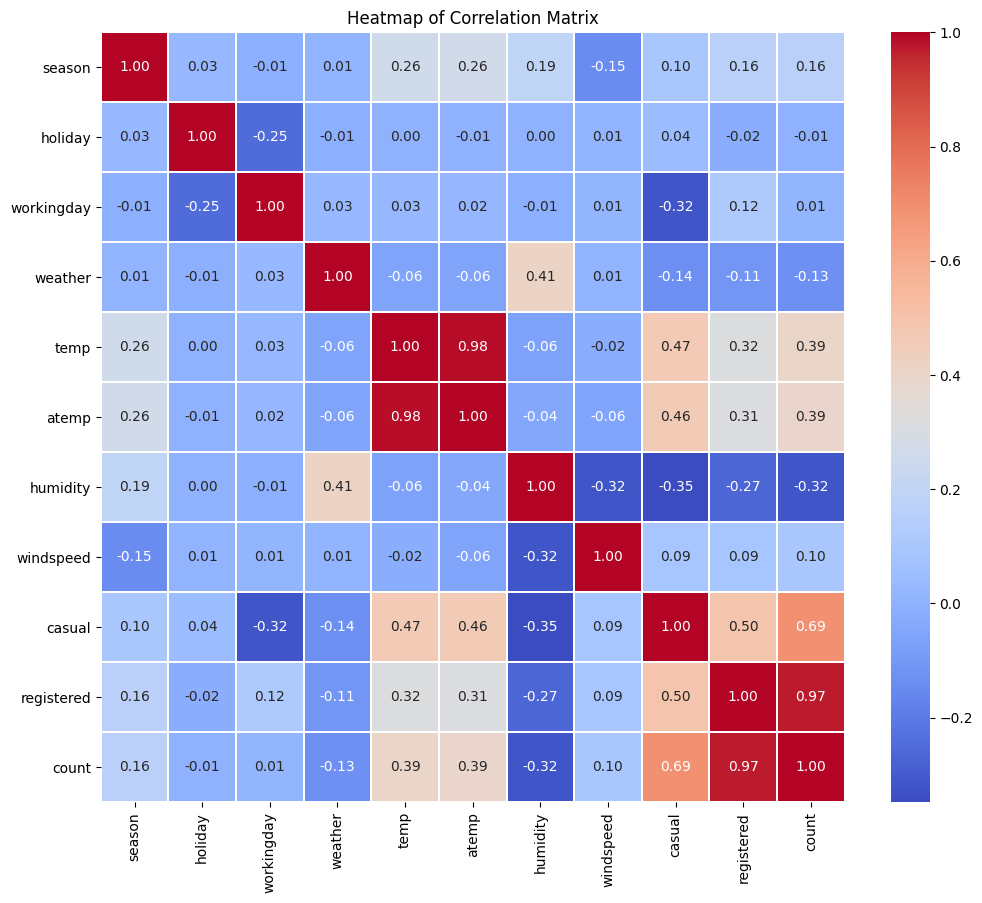

In [70]:
corr_matrix = df.corr()

# Отображение heatmap корреляционной матрицы
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.05)
plt.title("Heatmap of Correlation Matrix")
plt.show()

**Ответьте на вопрос**: с какими признаками количество прокатов коррелирует меньше всего (около 4 штуки). А с какими больше всего?

Ответ: humidity, holiday, weather, workingday

### 3. Barpot

Постройте Bar-график суммарного количества прокатов велосипедов по месяцам за каждый год одновременно. (будет 24 столбика)



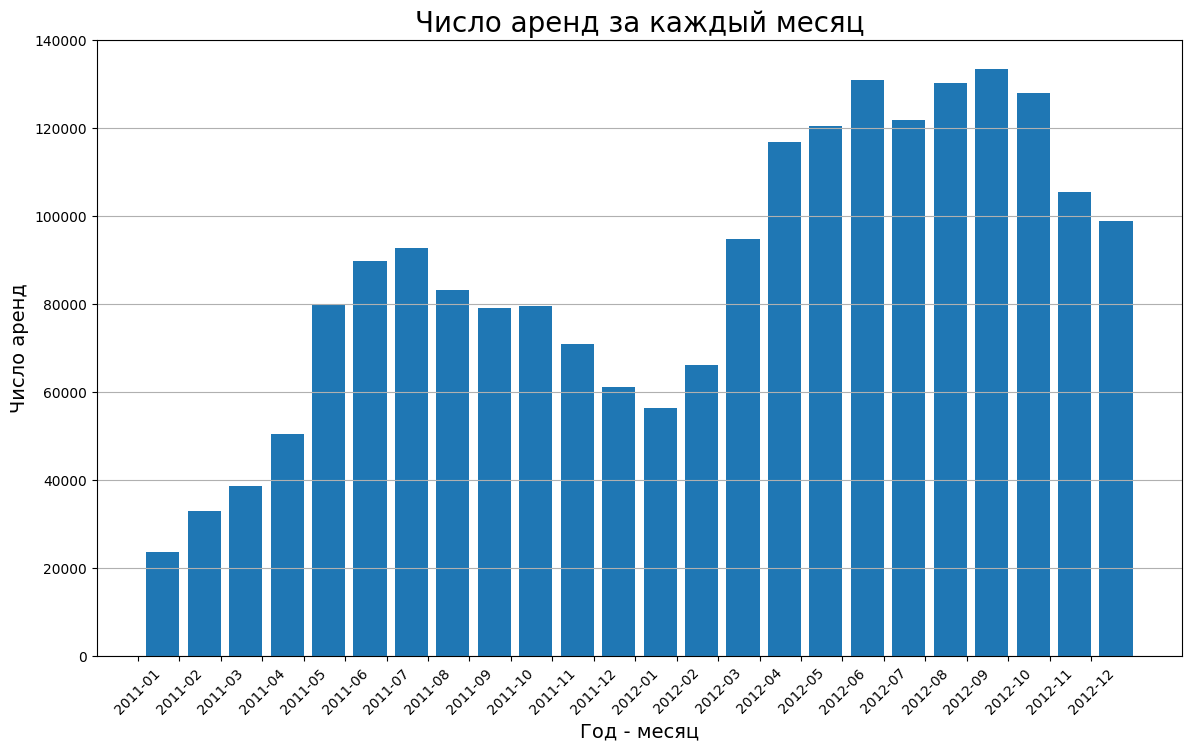

In [71]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
grouped_data = df.groupby(['year', 'month'])['count'].sum().reset_index()
plt.figure(figsize=(14, 8))
bar_width = 0.8
x_pos = grouped_data['month'] - 0.5 * bar_width + (grouped_data['year'] - 2011) * 12
plt.bar(x_pos, grouped_data['count'], width=bar_width)
plt.xlabel('Год - месяц', fontsize=14)
plt.ylabel('Число аренд', fontsize=14)
plt.title('Число аренд за каждый месяц', fontsize=20)
plt.xticks(range(0, len(grouped_data)), [f"{y}-{m:02d}" for y, m in zip(grouped_data['year'], grouped_data['month'])], rotation=45)
plt.grid(axis='y')
plt.show()

**Ответьте на вопрос:** почему в предыдущем графике была такая большая корреляция между количеством прокатов и годом?

Ответ: скорее всего прокат велеосипедов стал популярнее

### 4. Countplot

Постройте countplot диаграммы для признаков `weekday`, `weathersit`,



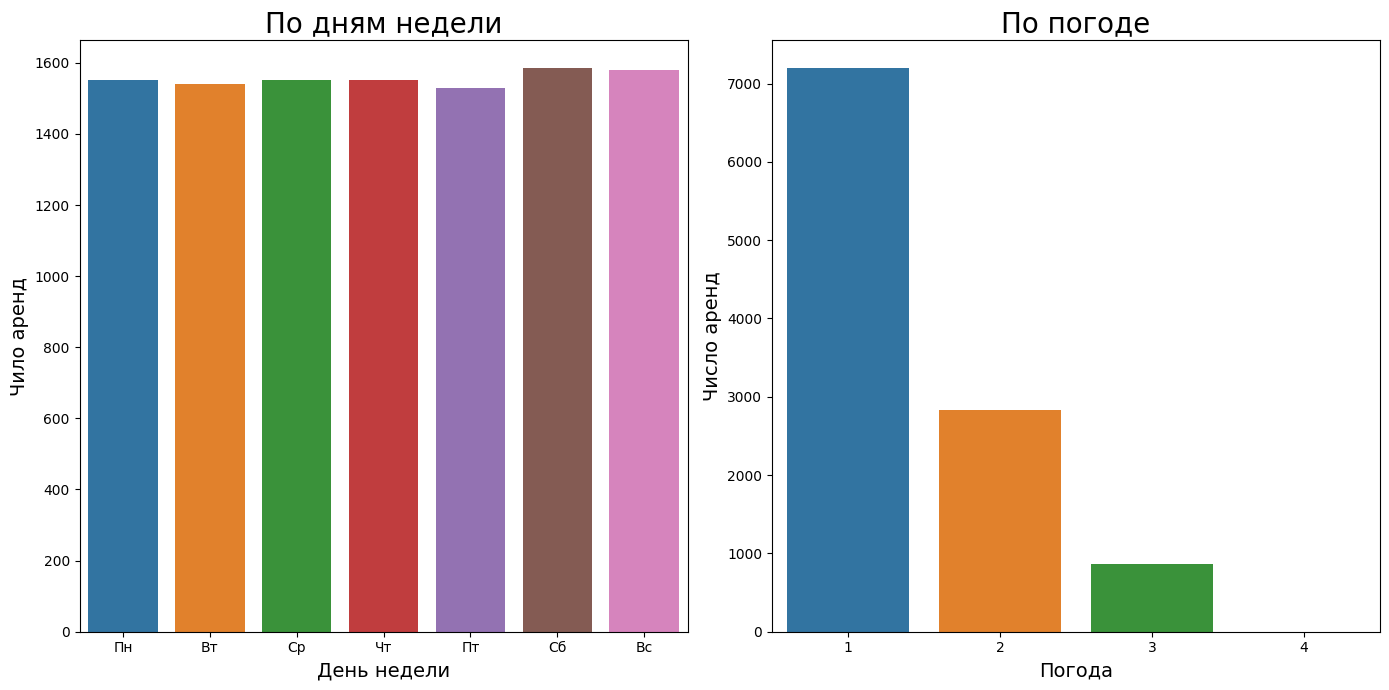

In [72]:
df['weekday'] = df['datetime'].dt.dayofweek
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.countplot(x='weekday', data=df)
plt.xlabel('День недели', fontsize=14)
plt.ylabel('Чило аренд', fontsize=14)
plt.title('По дням недели', fontsize=20)
plt.xticks(range(7), ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])

plt.subplot(1, 2, 2)
sns.countplot(x='weather', data=df)
plt.xlabel('Погода', fontsize=14)
plt.ylabel('Число аренд', fontsize=14)
plt.title('По погоде', fontsize=20)

plt.tight_layout()
plt.show()

**Ответьте на вопрос:** что вы можете сказать о том, как формировался этот датасет.



Ответ: с тяжелым трудом (моим)


**Ответьте на вопрос:** как называется распределение значений признака `weekday`?


    
Ответ: равномерно

### 5. Распределение

Постройте распределение целевого признака.


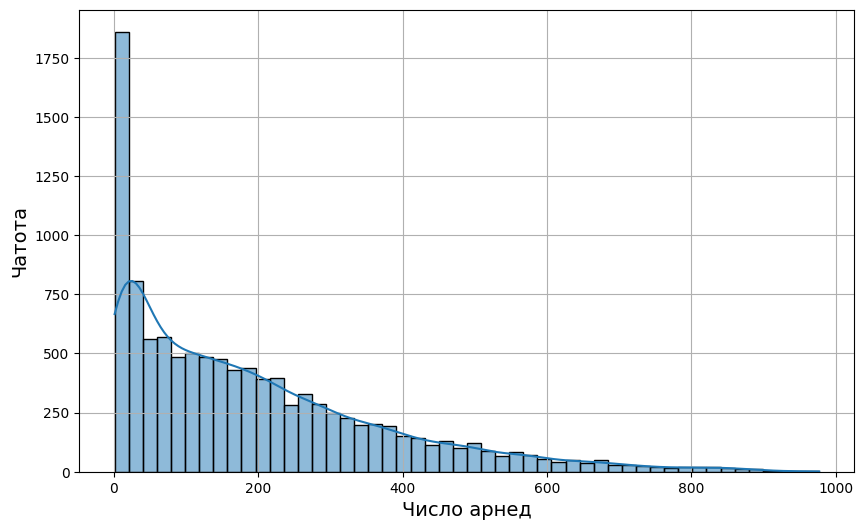

In [164]:
plt.figure(figsize=(10, 6))
sns.histplot(df['count'], bins=50, kde=True)
plt.xlabel('Число арнед', fontsize=14)
plt.ylabel('Чатота', fontsize=14)
plt.grid(True)
plt.show()


**Ответьте на вопрос:** основываясь на графике, сколько приблизительно в среднем прокатов бывает в день?

Ответ: 50-100


### 6. Совместное распределение признаков

Постройте график совместного распределения признаков температура и ощущение температуры.



<Figure size 1000x600 with 0 Axes>

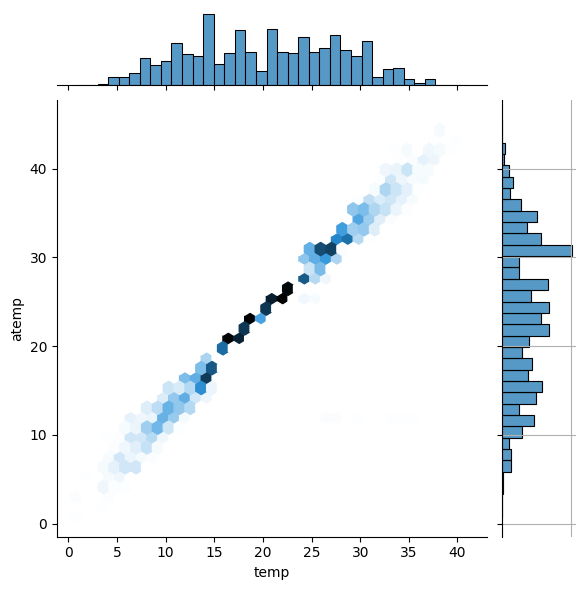

In [162]:
plt.figure(figsize=(10, 6))
sns.jointplot(x='temp', y='atemp', data=df, kind='hex')
plt.grid(True)
plt.show()

**Ответьте на вопрос:** вас в этом графике ничего не настораживает? Почему?

Ответ: возможно ощущаемая температура и реальная должна отличаться сильнее

### 7. Боксплот (ящик с усами)

Постройте график распределения (боксплот) количества прокатов велосипедов по месяцам в зависимости от того рабочий это день или нет.




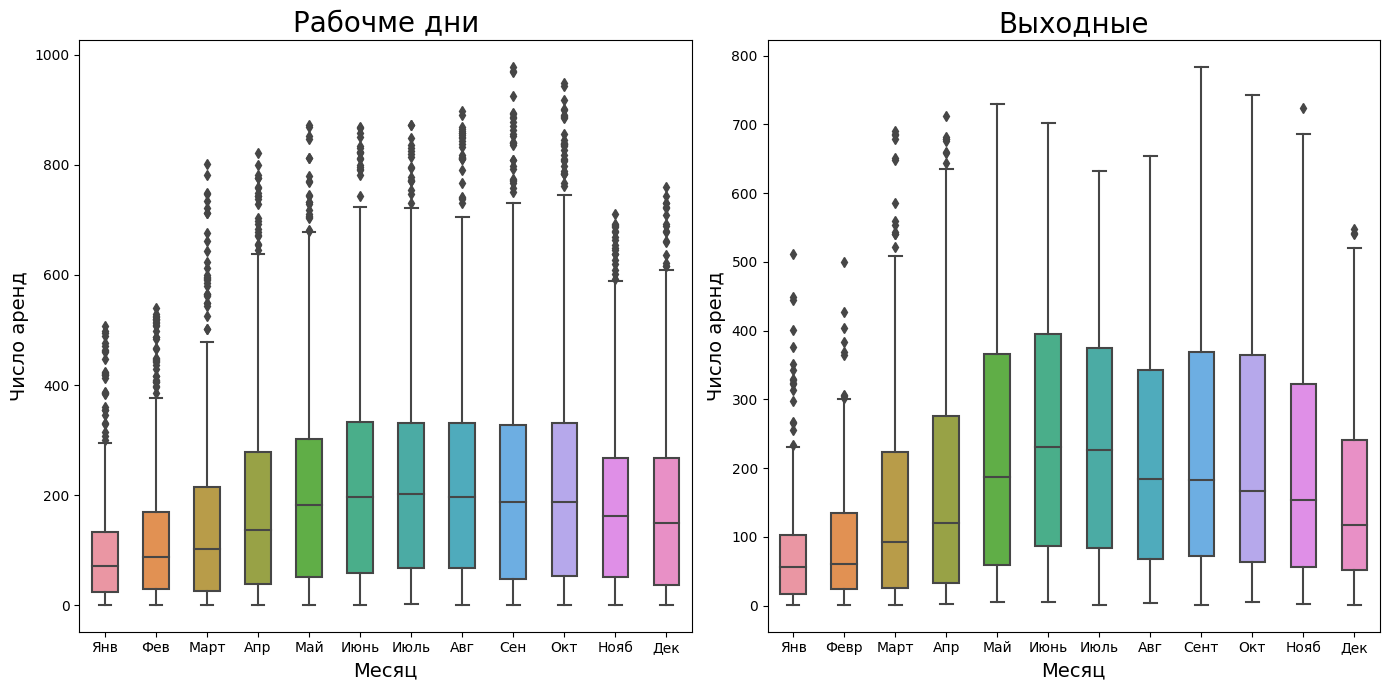

In [75]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
workingday_df = df[df['workingday'] == 1]
sns.boxplot(x='month', y='count', data=workingday_df, width=0.5)
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Число аренд', fontsize=14)
plt.title('Рабочме дни', fontsize=20)
plt.xticks(range(0, 12), ['Янв', 'Фев', 'Март', 'Апр', 'Май', 'Июнь', 'Июль', 'Авг', 'Сен', 'Окт', 'Нояб', 'Дек'])

plt.subplot(1, 2, 2)
non_workingday_df = df[df['workingday'] == 0]
sns.boxplot(x='month', y='count', data=non_workingday_df, width=0.5)
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Число аренд', fontsize=14)
plt.title('Выходные', fontsize=20)
plt.xticks(range(0, 12), ['Янв', 'Февр', 'Март', 'Апр', 'Май', 'Июнь', 'Июль', 'Авг', 'Сент', 'Окт', 'Нояб', 'Дек'])

plt.tight_layout()
plt.show()

**Ответьте на вопрос:** почему в некоторых месяцах чаще берут велосипеды в будний день, а в некоторые - в выходной.

Ответ: в нерабочие дни, в теплое время года, люди, скорее всего, чаще арендуют велосипеды для развлечения


## Комплексное задание №3. Визуальный анализ данных. Часть 2

In [1]:
!pip install seaborn==0.11.0
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.1/283.1 kB 2.0 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


In [2]:
colab = True # если работаете на своём компьютере, в локальной среде, поставьте False
if colab:
    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


В этом задании Вам предлагается провести визуальный анализ датасета результатов экзаменов студентов  https://www.kaggle.com/spscientist/students-performance-in-exams.

Исходные данные загрузите самостоятельно!

In [83]:
if colab:
    df = pd.read_csv('/content/drive/MyDrive/Data/StudentsPerformance.csv')
else:
    df = pd.read_csv("../../data/StudentsPerformance.csv")

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Ход задания:

#### 1. Постройте 3 графика, показывающих распределение результатов экзаменов (каждый график на предмет).


Графики должны быть в одном ряду и у них должен быть общий заголовок "Результаты экзаменов".

Для результатов каждого экзамена посчитайте медианные значения.


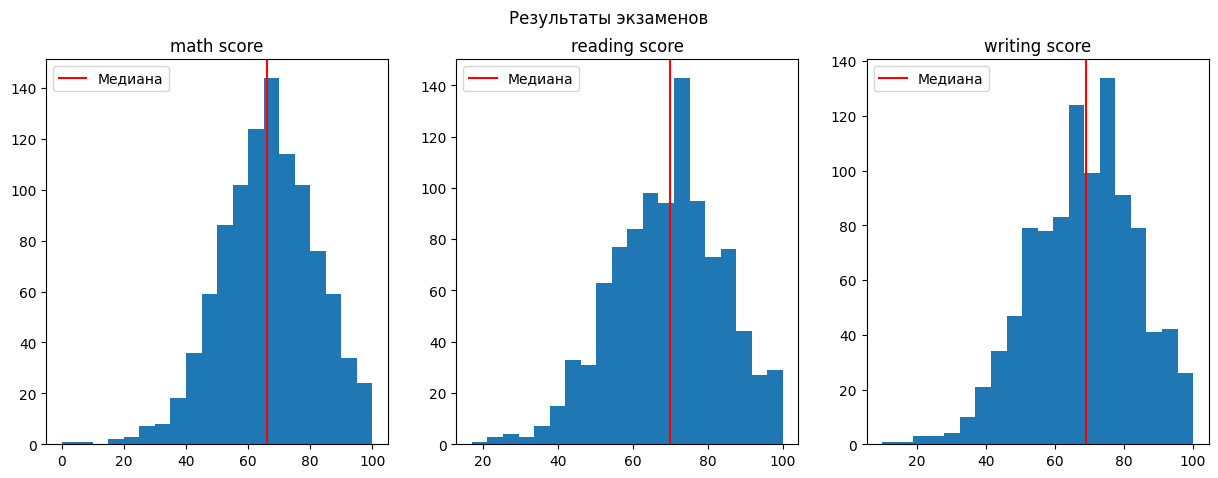

In [63]:
median_scores = df[['math score', 'reading score', 'writing score']].median()

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Результаты экзаменов')

for i, subject in enumerate(['math score', 'reading score', 'writing score']):
    axs[i].hist(df[subject], bins=20)
    axs[i].axvline(median_scores[subject], color='red', label='Медиана')
    axs[i].set_title(subject)
    axs[i].legend()

plt.show()

#### 2. Образование родителей
Какие уровни образование есть в столбце *'parental level of education'* и сколько строк в датафрейме соответствует каждому уровню?

Постройте график и ответьте на вопрос ниже

Отличаются ли баллы по математике у детей с разным образованием родителей?
Постройте график, где по оси Х находятся уровни образования родителей, а по У - баллы по математике.


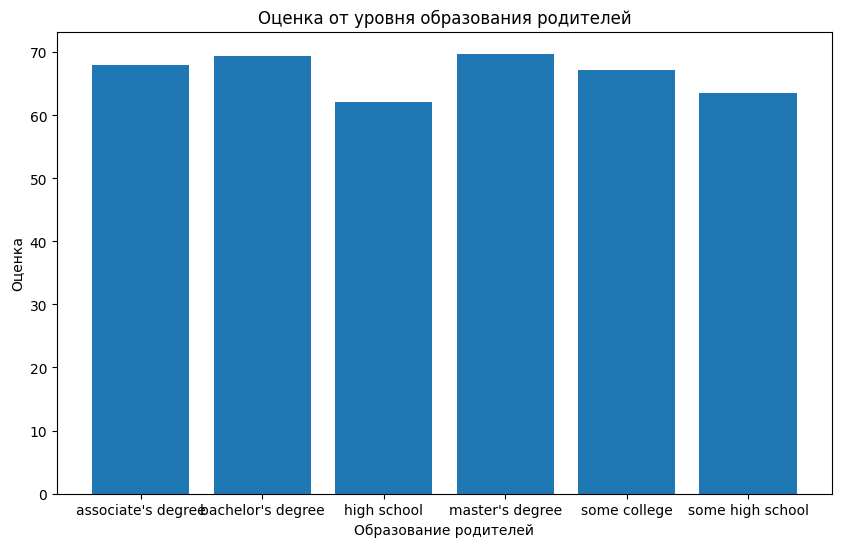

Да, различается. У студентов родители которых окончили только старшую школу оценка в среднем ниже.


In [101]:
math_scores_by_education = df.groupby('parental level of education')['math score'].mean()

plt.figure(figsize=(10, 6))
plt.bar(math_scores_by_education.index, math_scores_by_education.values)
plt.xlabel('Образование родителей')
plt.ylabel('Оценка')
plt.title('Оценка от уровня образования родителей')
plt.show()
print('Да, различается. У студентов родители которых окончили только старшую школу оценка в среднем ниже.')

#### 3. Выведите число студенток, набравших больше 90 баллов по всем предметам.


In [97]:
filtered_df = df[(df['gender'] == 'female') &
                 (df['math score'] > 90) &
                 (df['reading score'] > 90) &
                 (df['writing score'] > 90)]
print('Число студенток, набравших больше 90 баллов по всем предметам:', len(filtered_df))

Число студенток, набравших больше 90 баллов по всем предметам: 17


#### 4. Сравните баллы у студентов разных полов. Используя agg() выведите минимальное, максимальное и медианное значение


In [100]:
scores_by_gender = df.groupby('gender')[['math score', 'reading score', 'writing score']].agg(['min', 'max', 'median'])
scores_by_gender.columns = ['Math Min', 'Math Max', 'Math Median', 'Reading Min', 'Reading Max', 'Reading Median', 'Writing Min', 'Writing Max', 'Writing Median']
scores_by_gender

,Math Min,Math Max,Math Median,Reading Min,Reading Max,Reading Median,Writing Min,Writing Max,Writing Median
gender,,,,,,,,,
female,0,100,65.0,17,100,73.0,10,100,74.0
male,27,100,69.0,23,100,66.0,15,100,64.0


#### 5. Выясните, влияет ли обед и подготовка к тесту на средний балл студентов разного пола
###### (подсказка: используете  [pd.agg()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html))

In [102]:
scores_by_gender_lunch_prep = df.groupby(['gender', 'lunch', 'test preparation course'])[['math score', 'reading score', 'writing score']].agg('mean')
scores_by_gender_lunch_prep.columns = ['Math Mean', 'Reading Mean', 'Writing Mean']

scores_by_gender_lunch_prep

Math Mean  Reading Mean  \
gender lunch        test preparation course                            
female free/reduced completed                60.785714     73.428571   
                    none                     52.890756     63.831933   
       standard     completed                71.131579     79.798246   
                    none                     66.530233     73.386047   
male   free/reduced completed                65.639344     65.786885   
                    none                     60.609524     59.076190   
       standard     completed                75.955752     72.601770   
                    none                     69.832512     64.719212   

                                             Writing Mean  
gender lunch        test preparation course                
female free/reduced completed                   74.371429  
                    none                        61.781513  
       standard     completed                   81.508772  
                    none                        72.967442  
male   free/reduced completed                   65.737705  
                    none                        55.285714  
       standard     completed                   71.982301  
                    none                        61.906404

#### 6. Постройте график, показывающий зависимость уровня образования родителей от их расы

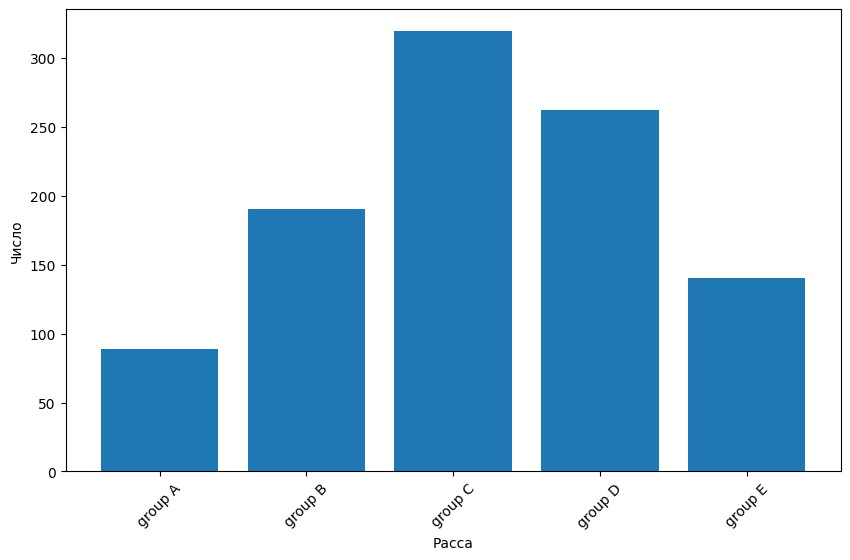

In [129]:
education_by_race = df.groupby('race/ethnicity')['parental level of education'].value_counts().groupby(level=0).sum()

plt.figure(figsize=(10, 6))
plt.bar(education_by_race.index, education_by_race.values)
plt.xlabel('Расса')
plt.ylabel('Число')
plt.xticks(rotation=45)

plt.show()

#### 7. Постройте график, показывающий зависимость прохождения подготовительного теста от уровня образования родителей.


Кто чаще ходит на курсы: дети, родители которых закончили только старшую школу, или дети, чьи родители получили степень бакалавра\магистра?

<Figure size 640x480 with 0 Axes>

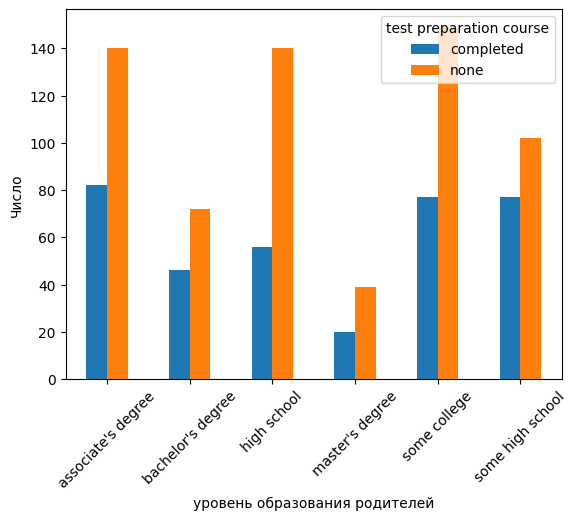

In [135]:
test_prep_by_education = df.groupby('parental level of education')['test preparation course'].value_counts().unstack(fill_value=0)

plt.figure()
test_prep_by_education.plot(kind='bar')
plt.xlabel('уровень образования родителей')
plt.ylabel('Число')
plt.xticks(rotation=45)
plt.show()

#### 8. Постройте plot.pie, показывающий, сколько людей сдали\не сдали экзамен по математике.

Сдавшим считается человек, набравший 40 баллов.

###### Подсказка: создайте столбец в датафрейме, который содержит результат сдачи (сдал или не сдал)

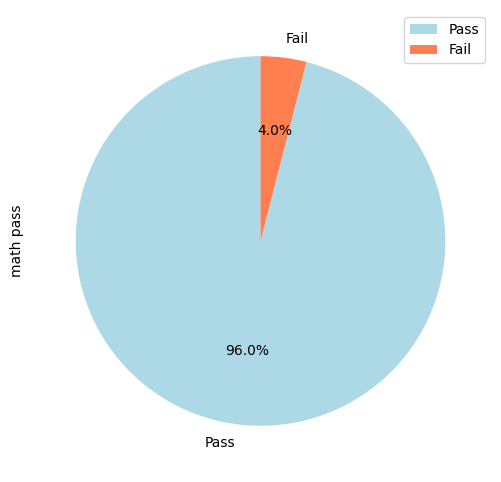

In [146]:
df['math pass'] = df['math score'].apply(lambda x: 'Pass' if x >= 40 else 'Fail')

math_pass_counts = df['math pass'].value_counts()

plt.figure(figsize=(6, 6))
math_pass_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'coral'])
plt.legend()
plt.show()

#### 9. Постройте plot.pie, показывающий распределение студентов по оценкам

Оценки студентов выставляются по шкале:<br>
0  - 40 marks : grade E<br>
41 - 60 marks : grade D<br>
60 - 70 marks : grade C<br>
70 - 80 marks : grade B<br>
80 - 90 marks : grade A<br>
90 - 100 marks : grade O<br>

Для этого посчитайте сумму результатов за 3 экзамена и найдите среднее. Оценка выставляется по среднему значению. Если студент не сдал математику(даже если средний балл выше 40), он получает Е

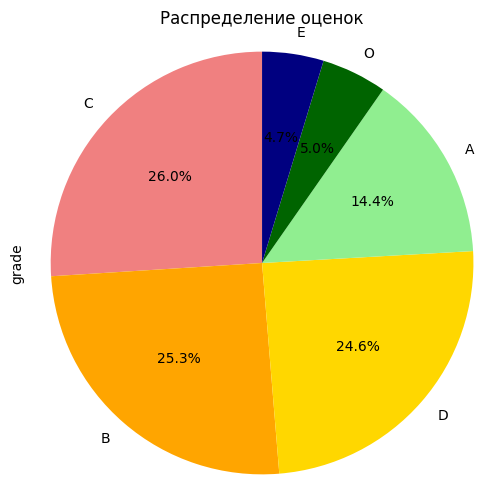

In [152]:
df['average score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

bins = [0, 40, 60, 70, 80, 90, 100]
labels = ['E', 'D', 'C', 'B', 'A', 'O']
df['grade'] = pd.cut(df['average score'], bins=bins, labels=labels, include_lowest=True)

# Изменить оценку студента на 'E', если он не сдал экзамен по математике
df.loc[df['math score'] < 40, 'grade'] = 'E'

# Подсчитать количество студентов в каждой группе
grade_counts = df['grade'].value_counts()

# Нарисовать круговую диаграмму
plt.figure(figsize=(6, 6))
grade_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'orange', 'gold', 'lightgreen', 'darkgreen', 'navy'])
plt.axis('equal')
plt.title('Распределение оценок')
plt.show()

#### 10. Постройте countplot, показывающий зависимость между итоговой оценкой студентов и его полом. Студенты какого пола получили больше оценок О, А, В

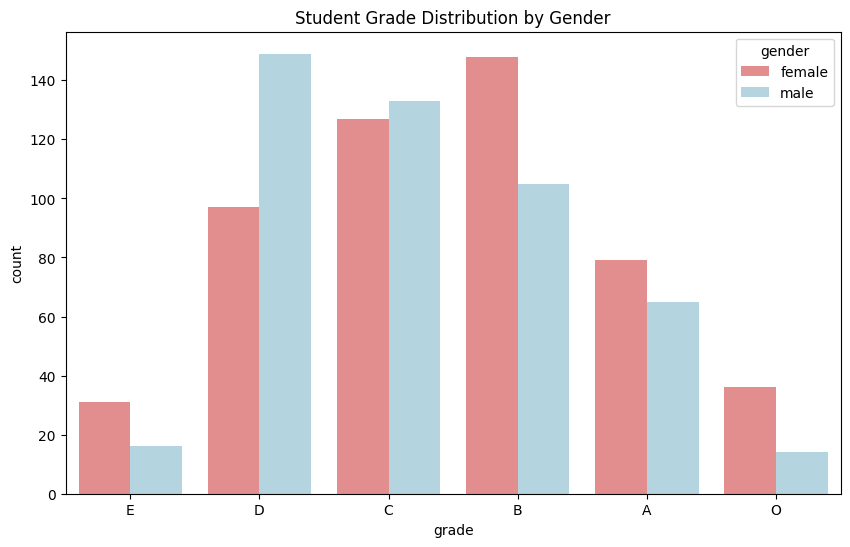

Студенты женсокого пола получили больше оценок O, A, B


In [151]:
plt.figure(figsize=(10, 6))
sns.countplot(x='grade', hue='gender', data=df, palette=['lightcoral', 'lightblue'])
plt.title('Student Grade Distribution by Gender')
plt.show()
print('Студенты женсокого пола получили больше оценок O, A, B')